# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [14]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [15]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))
medv: median value of owner-occupied homes in $1000s
dis: weighted mean of distances to five Boston employment centres

_(ii)_ What concept ‘defines’ the plotted line?
When minimizing the residual sum of squares (RSS), the estimate of coeffecients can be calculated and the plotted line can be defined.

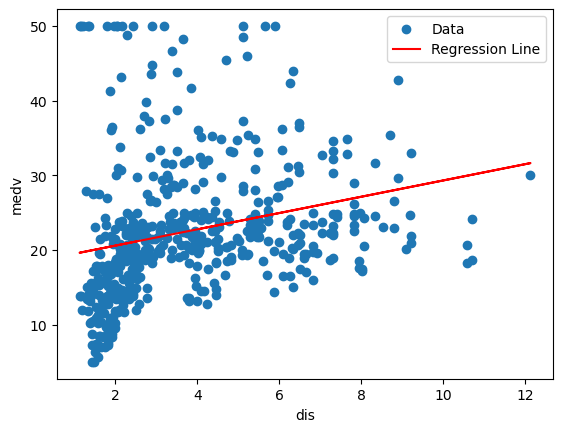

In [16]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
null hypothesis: there is no relationship between dis (X) and medv (Y);
alternative hypothesis: there is some relationship between dis (X) and medv (Y).

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [17]:
# Add your code here
# X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
#                  'dis': Boston['dis']})
X = sm.add_constant(Boston['dis'])

X[:4] # display a first 4 rows for X

# Extract the response and fit the model
Y = Boston['medv']
model = sm.OLS(Y, X) # to specify the model
results = model.fit() # to fit the model




Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
the _coefficient estimates_ for $B_0$ (intercept) is 18.3901;
the _coefficient estimates_ for $B_1$ (slope) is 1.0916.

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
the _standard errors_ for $B_0$ is 0.817;
the _standard errors_ for $B_1$ is 0.188.

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
the _confidence intervals_ for $B_0$: between 16.784179 and 19.995997;
the _confidence intervals_ for $B_1$: between 0.721509 and 1.461717.

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        23:50:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
               0          1
const  16.784179  19.995997
dis     0.721509   1.461717



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [ ]:
# Your answer here

(viii)
R-squared 6.2% (0.062) means 6.2% of the variability observed in the target variable is explained by the regression model, thus the model is not a good fit.
From the R-squared statistic we can see that some of the variation in `medv` is explained by `dis` but a lot of it is not. 
This might be an indication that there are other variables in the data set that are affecting the response.

(ix)
F statistic is 33.58. the regression is somewhat effective in its explanation of the variation Y in the dependent variable X.
A large F-statistic value proves that the regression model is effective in its explanation of the variation in the dependent variable and vice versa. 
On the contrary, an F-statistic of 0 indicates that the independent variable does not explain the variation in the dependent variable.

The p value for coeffecient is 0.000.
A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 
A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [37]:
# Add your code here

X = sm.add_constant(Boston[['dis','rm']])

# X [:4] # display a first 4 rows for X

# Extract the response and fit the model
Y = Boston['medv']
model = sm.OLS(Y, X) # to specify the model
results = model.fit() # to fit the model
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        00:46:16   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

null hypothesis: there is no relationship between 'dis' (X1), 'rm' (X2) and medv (Y);
alternative hypothesis: there is some relationship between dis' (X1), 'rm' (X2) and medv (Y).

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?
P-value:
The p-value for the interaction term `dis` and `rm` is 0 or very close to 0, so it is statistically significant. Therefore, both X1 'dis' and X2 'rm' should be added to the model.

R-squared:
The adjusted r-squred is 0.494, meaning 49.4% of the variability observed in the target variable `medv` is explained by the regression model, thus the model is a good fit.
From the R-squared statistic we can see that some of the variation in `medv` is explained by `dis` but almost half of it is not. 
This might be an indication that there are other variables in the data set that are affecting the response.

Prob (F-statistic):
Prob (F-statistic) is close to 0, meaning there is no reason to reject null hypothesis


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

For the plot with predictor 'dis', there are some outliers for data points with residual value between 20 and 40 or below 20.
The presence of outliers can impact the validity of the normality and constant variance assumptions, resulting in invalid confidence intervals and p-values for regression coefficients. With a large sample size, these impacts will likely be small.

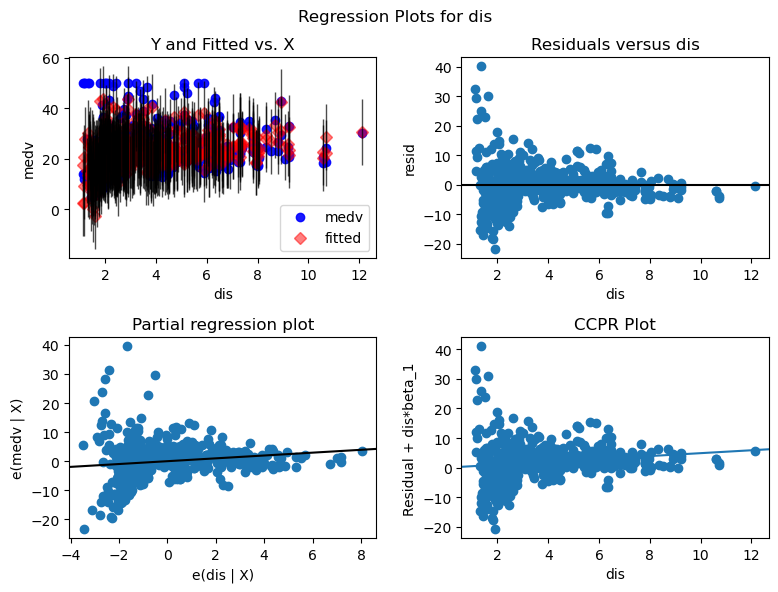

In [51]:
# plot for the regression model with the predictor 'dis'
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog (results, 'dis', fig=fig)
plt.show()

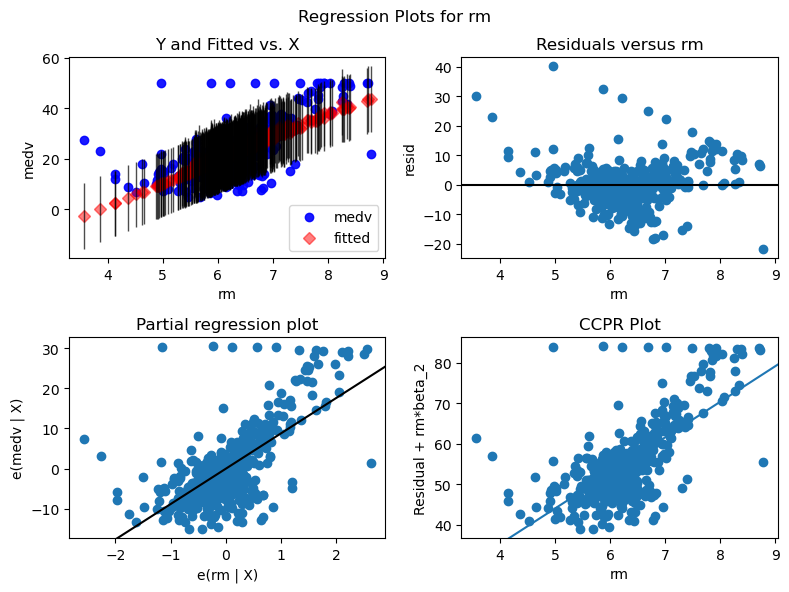

In [50]:
# plot for the regression model with the predictor 'rm'
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog (results, 'rm',fig=fig)
plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [33]:
# Add your code here

model = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        00:24:25   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

Intepretation of the data:
P-value:
The p-value for the interaction term 'dis*rm' is 0, so it is statistically significant. Therefore, both X1 'dis' and X2 'rm' should be added to the model, regardless of their p-value respectively.

R-squared:
The adjusted r-squred is 0.513, meaning 51.3% of the variability observed in the target variable 'medv' is explained by the regression model, thus the model is a good fit.
From the R-squared statistic we can see that some of the variation in `medv` is explained by `dis` but almost half of it is not. 
This might be an indication that there are other variables in the data set that are affecting the response.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
